## **Housing Regression**
### **NAME**: EDWARD TAN YUAN CHONG

### **Importing modules required later on**

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# Varibles for plots
sns.set()
muted = sns.color_palette('muted')

c:\Users\edw4r\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### **Functions to use later on**

In [2]:
# Function to print evaluation metrics from predicted values
def evaluate(y_test,y_pred,model_name):
    print(model_name + "Regression Results:\n" + "-"*45)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r_square = metrics.r2_score(y_test, y_pred)
    mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
    evar = metrics.explained_variance_score(y_test,y_pred)
    print('MAE:', mae)
    print('MAPE: ',mape)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R-squared:', r_square)
    print('Explained Variance: ',evar)
    print('-'*45)

# Function to plot scatterplot of predicted values against actual values
def scatter(y_test,y_pred,type):
    sns.regplot(x=y_pred,y=y_test,scatter=True,fit_reg=True,ci=95,line_kws={'color':"#ee6666"}).set(title='Scatterplot of predicted housing price against actual housing price for ' + type)
    plt.ticklabel_format(style='plain',axis='y')
    plt.show()

# Function to plot residual plot
def residualPlot(y_test,y_pred,model_name):
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='#ee6666', linestyle='--')
    plt.xlabel('Predicted Price')
    plt.ylabel('Residuals')
    plt.title('Residual plot of ' + model_name)
    plt.show()

# Function to plot residual KDE plot
def residualKdePlot(y_test,y_pred,model_name):
    residuals= pred-y_test
    sns.histplot(residuals,stat='density').set(title='Residual KDE plot of ' + model_name)
    sns.kdeplot(residuals,color="#ee6666")
    plt.show()

# **PART B: REGRESSION**

## **INTRODUCTION**

### **How is your prediction task defined? And what is the meaning of the output variable?**
The prediction task would be to build and train a regression model to predict the housing price in the US based on various factors of a house, such as City, House Area in sqm, Number of bedrooms and toilets, Renovation status etc. 

The output variable, Price ($), would represent the price of the housing in the US that are paired with its housing factors.

In [3]:
# Import dataset
housing = pd.read_csv('./housing_dataset.csv')

# Drop unnecessary column House ID
housing = housing.drop(['House ID'],axis=1)

# Print shape of dataset
print("Shape of dataset: " + str(housing.shape))

# Print sample of dataset
housing.sample(5)

Shape of dataset: (545, 7)


,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
507,Seattle,360.0,2,1,1,unfurnished,259000
486,Seattle,600.0,2,1,1,semi-furnished,287000
485,Seattle,363.0,2,1,1,unfurnished,287000
471,Seattle,375.0,3,1,2,unfurnished,301000
66,Denver,1320.0,2,1,1,furnished,693000


In [4]:
# Describe dataset
housing.describe()

,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($)
count,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,515.054128,2.965138,1.286239,1.805505,4.766729e+05
std,217.014102,0.738064,0.502470,0.867492,1.870440e+05
min,165.000000,1.000000,1.000000,1.000000,1.750000e+05
25%,360.000000,2.000000,1.000000,1.000000,3.430000e+05
50%,460.000000,3.000000,1.000000,2.000000,4.340000e+05
75%,636.000000,3.000000,2.000000,2.000000,5.740000e+05
max,1620.000000,6.000000,4.000000,4.000000,1.330000e+06


## **EXPLORATORY DATA ANALYSIS (EDA)**

### **Distribution of Housing Price**

This chart shows the distribution of all the housing prices and we can see that most houses have prices around $400,000. The data can also be seen to be positively-skewed.

Skew Coefficient of Housing Price ($): 1.21223883702798


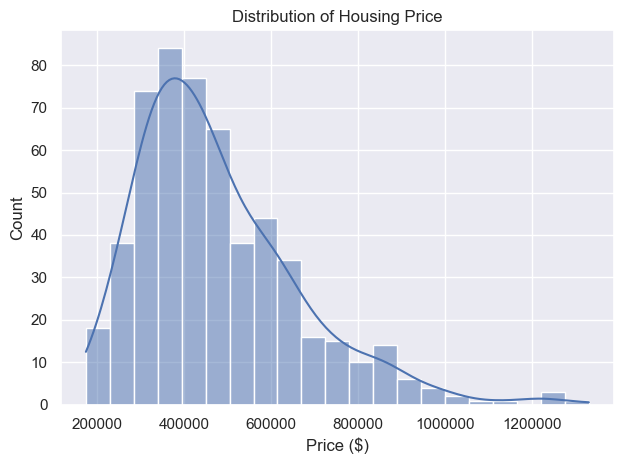

In [5]:
print("Skew Coefficient of Housing Price ($): " + str(housing['Price ($)'].skew()))
sns.histplot(housing,x='Price ($)',kde=True).set(title='Distribution of Housing Price')
plt.ticklabel_format(style='plain',axis='x')
plt.tight_layout()
plt.show()

### **Correlation heatmap between variables in dataset**

This heatmap shows the correlation between housing features in the dataset, and from this we can see that House Area (sqm) and No. of Toilets correlate better with Price ($), our output variable, best among all the features, and are likely the features that might be of most importance.

However, in general, there are no strong relationships (>0.8) between the variables and especially between the features and output variables which may lead to poorer model performance and predictions.

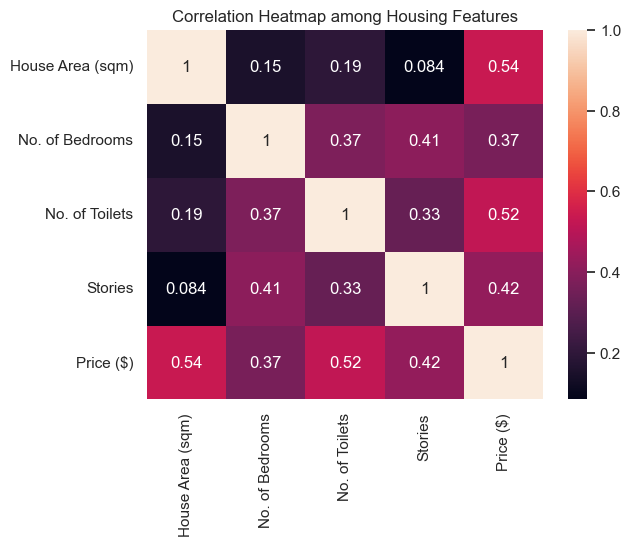

In [6]:
sns.heatmap(housing.corr(),annot=True).set(title='Correlation Heatmap among Housing Features')
plt.show()

### **Pricing of Housing Against Area Square Metre of Housing**

This scatterplot shows the relationship between the price of housing against the area square metre of housing. The correlation coefficient of 0.54 shows that there is a moderate positive linear relationship between the housing price and area square metre of house, which shows as a house is bigger, hence larger area square metre, they tend to become more costly as well. Hence, the area square metre of a house would play a part in the pricing of the house.

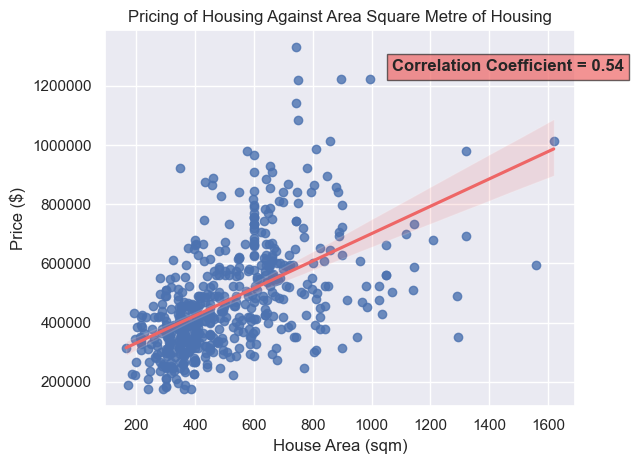

In [7]:
sns.regplot(housing,x='House Area (sqm)',y='Price ($)',line_kws={'color':"#ee6666"}).set(title='Pricing of Housing Against Area Square Metre of Housing')
corr = housing[['House Area (sqm)','Price ($)']].corr()
plt.text(1070,1250000,'Correlation Coefficient = {:.2f}'.format(corr.values[0,1]),bbox=dict(facecolor="#ee6666",alpha=0.7,edgecolor="#2a2a2a"),fontweight='bold')
plt.ticklabel_format(axis='y',style='plain')
plt.tight_layout()
plt.show()

### **Mean Housing Price by Variables**

These charts show the mean housing price based on variables such as City, number of Stories, number of bedrooms and number of toilets.

**City**: From the mean housing price by city, we can see that cities such as Chicago and Denver tend to have higher mean housing prices, followed by Boston, then New York and lastly Seattle, which show that the city the housings are from would affect its price, possibly due to the popularity of that city.

**Number of Stories**: From the mean housing price by number of stories, we can see an increasing trend in mean housing price as number of stories increase, showing that housings that have a higher number of stories would become increasingly costly, as higher number of stories could possibly allow for better views, higher area per square metre, more privacy and other factors that could lead to a higher price. This then shows that number of stories would play a part in housing price.

**Number of Bedrooms**: From the mean housing price by number of bedrooms, we can see that there is also an increasing trend in housing price as number of bedrooms increase, however, houses with 4 and 5 bedrooms tend to cost around the same price, and houses with 6 bedrooms tend to be significantly less compared to 4 and 5 bedrooms, costing around the same as a 3 bedroom house, this could be due to lack of data causing this anomaly. Despite that, the chart still shows that the number of bedrooms a house has would still affect its price.

**Number of Toilets**: From the mean housing price by number of toilets, we can also see that there is an increasing trend in housing price as number of toilets increase, likely due to greater accessibility, hence higher demand and leading to higher costs for that housing with more toilets. This shows that the number of toilets also contribute to affecting housing price.

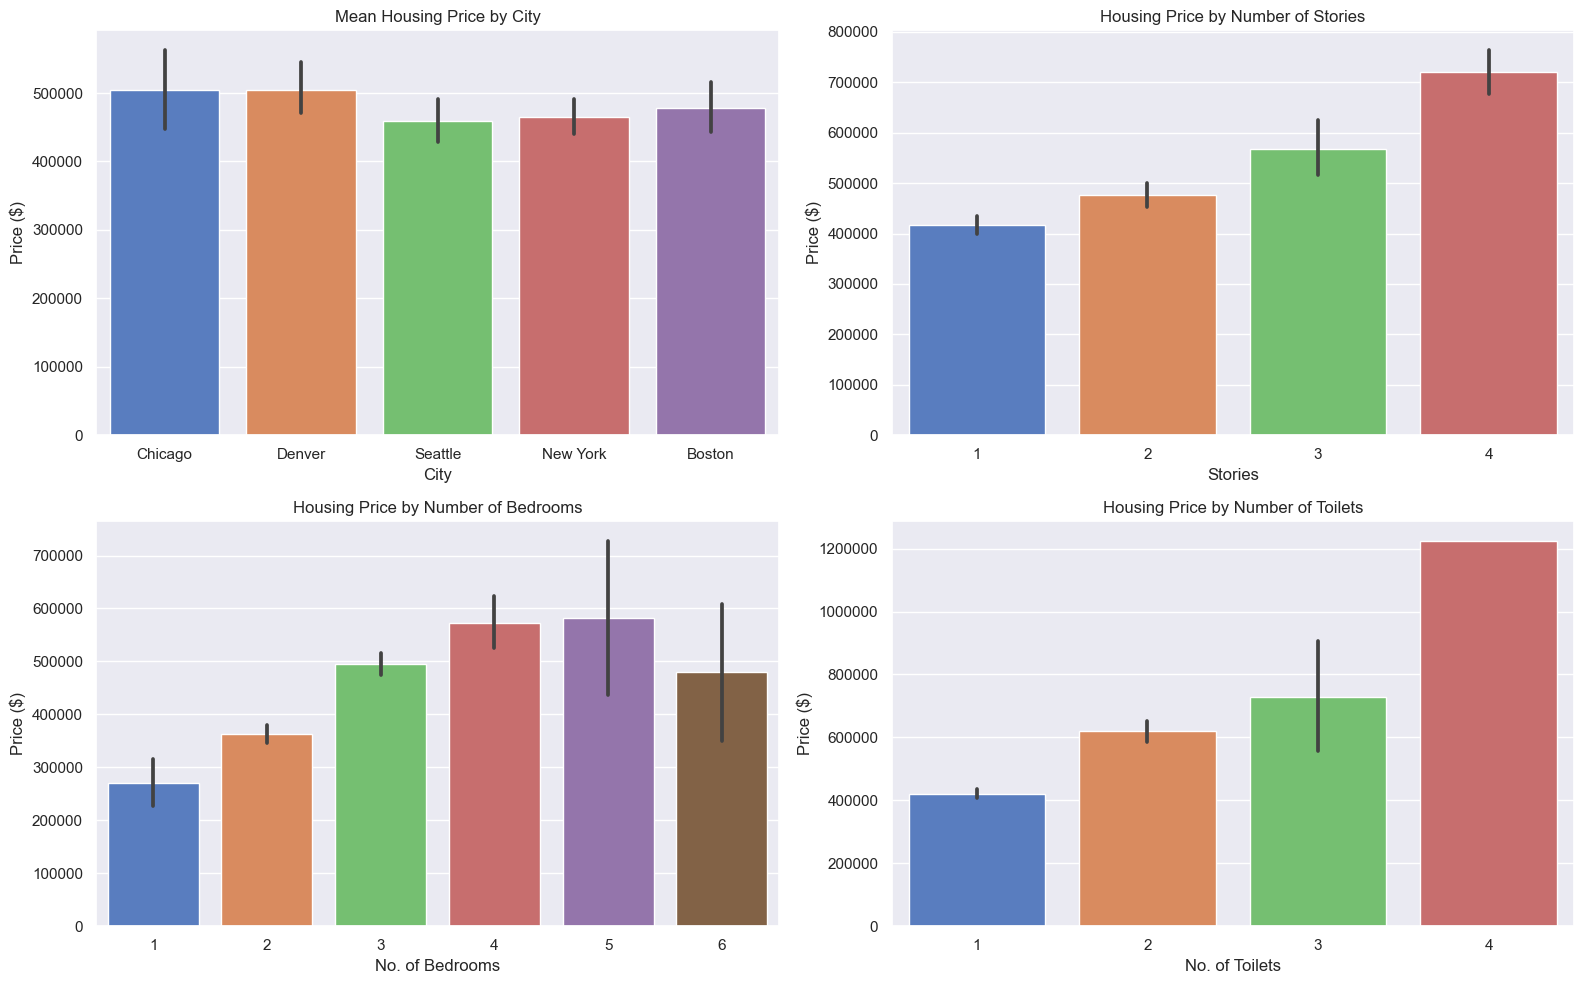

In [8]:
fig,axs = plt.subplots(2,2,figsize=(16,10))
sns.barplot(housing,x='City',y='Price ($)',palette=muted,ax=axs[0][0]).set(title='Mean Housing Price by City')
sns.barplot(housing,x='Stories',y='Price ($)',palette=muted,ax=axs[0][1]).set(title='Housing Price by Number of Stories')
sns.barplot(housing,x='No. of Bedrooms',y='Price ($)',palette=muted,ax=axs[1][0]).set(title='Housing Price by Number of Bedrooms')
sns.barplot(housing,x='No. of Toilets',y='Price ($)',palette=muted,ax=axs[1][1]).set(title='Housing Price by Number of Toilets')
plt.ticklabel_format(style='plain',axis='y')
plt.tight_layout()
plt.show()

### **Housing Price sorted by Renovation Status**

This boxplot shows the distribution of housing price sorted by renovation status, which includes Furnished, Semi-furnished, and Unfurnished. 

From the boxplot, we can see from the median value that housings that are furnished tend to have a higher median housing price, followed by semi-furnished, and unfurnished. There are also unfurnished housings that still cost more than furnished or semi-furnished housings as sometimes owners might want to furnish their own housings, hence preferring to pay more for an unfurnished housing. 

This boxplot shows that the housing's renovation status would also be a factor that affects housing price.

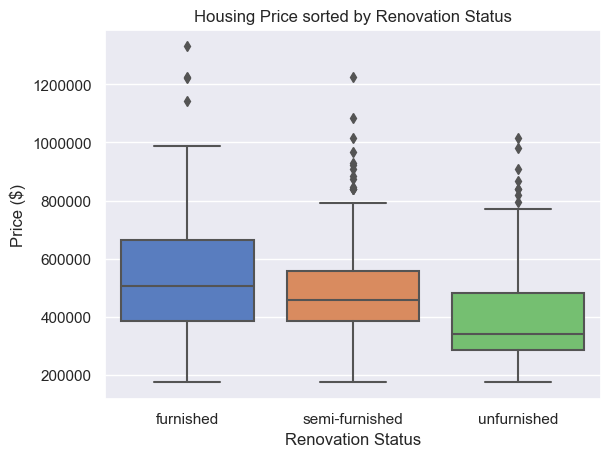

In [9]:
sns.boxplot(housing,x='Renovation Status',y='Price ($)',palette='muted').set(title='Housing Price sorted by Renovation Status')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

## **FEATURE ENGINEERING**

### **How do you represent your data as features?**
By using pd.get_dummies() function, it will encode categorical features into dummy variables, examples such as City_Chicago, where 1 representing City as Chicago, and 0 representing City as not Chicago. This then allows the categorical data to be used in the learning algorithm as well to predict.


In [10]:
# Create dummy variable
housing_dummy = pd.get_dummies(housing,drop_first=True)
housing_dummy.sample(1)

,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($),City_Chicago,City_Denver,City_New York,City_Seattle,Renovation Status_semi-furnished,Renovation Status_unfurnished
1,896.0,4,4,4,1225000,0,1,0,0,0,0


### **Did you process the features in any way?**

Since the data has no missing values, duplicate rows, and no errors in the datatypes of the columns, not much data cleaning was done. However, I did utilize sklearn.preprocessing libary's RobustScaler to scale the values of the features.

There were more processing of features that were not implemented in the overall system such as fixing skewness of data, removing outliers and creating validation sets, as they ended up worsening the model's performance overall.

In [11]:
# Check for missing values
print("Number of missing values: \n" + str(housing_dummy.isna().sum().sort_values()))

Number of missing values: 
House Area (sqm)                    0
No. of Bedrooms                     0
No. of Toilets                      0
Stories                             0
Price ($)                           0
City_Chicago                        0
City_Denver                         0
City_New York                       0
City_Seattle                        0
Renovation Status_semi-furnished    0
Renovation Status_unfurnished       0
dtype: int64


In [12]:
# Check for duplicate rows
print('Number of duplicate rows in dataset: ' + str(housing_dummy.duplicated().sum()))

Number of duplicate rows in dataset: 0


In [13]:
# Check datatypes of columns in dataset
housing_dummy.dtypes

House Area (sqm)                    float64
No. of Bedrooms                       int64
No. of Toilets                        int64
Stories                               int64
Price ($)                             int64
City_Chicago                          uint8
City_Denver                           uint8
City_New York                         uint8
City_Seattle                          uint8
Renovation Status_semi-furnished      uint8
Renovation Status_unfurnished         uint8
dtype: object

### **Splitting data into test and train set**
I utilized train_test_split from sklearn.model_selection library to split my data into train and test datasets to be used later on, with 80% of the data on training and 20% of the data on testing.

Initially, I had also split my train dataset to form a train dataset and validation dataset, so that I would be able to validate models before hyperparameter tuning, however, by doing so, it seemed to decrease all the model's performances possibly due to lesser training data, hence I opted out of creating a validation set.

In [14]:
# Import modules needed
from sklearn.model_selection import train_test_split

# Create target and predictor variable
X = housing_dummy.drop(['Price ($)'],axis=1)
y = housing_dummy['Price ($)']

# Split data into train and test data, with test size of 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Split train data to train and validation data, with validation dataset size of 0.2 [NOT IMPLEMENTED]
# X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2, random_state=21)

### **Fix skewness of housing price [NOT IMPLEMENTED]** 
Initially, I logarithmically transformed my output values which improved my scores when it was logarithmically transformed, however, when I applied the inverse transformation when evaluating the model, it seemed to worsen my results. Therefore, I chose to not implemented it.

I utilized FunctionTransformer from sklearn.preprocessing library to logarithmically transform the y values, Price ($), to fix the skewness of the data and transform the data such that it is more normally distributed.

However, when doing this, ensure that the data is transformed back during prediction and evaluating of model accuracy with np.exp().

In [15]:
# # Import modules needed
# from sklearn.preprocessing import FunctionTransformer

# # Instantiate function transformer
# log_transform = FunctionTransformer(np.log1p)

# # Fit to train, test, and validation data
# y_train = log_transform.fit_transform(y_train)
# y_test = log_transform.transform(y_test)
# # y_val = log_transform.transform(y_val) # Not included as validation dataset not implemented

View skewness of housing price AFTER Transformation

In [16]:
# # Check skewness of housing price
# housing_price = np.concatenate((y_train,y_test))
# print("Skew Coefficient of Housing Price ($) AFTER Transformation: " + str(pd.DataFrame(housing_price).skew()[0]))
# sns.histplot(housing_price,kde=True).set(title='Distribution of Housing Price AFTER Transformation',xlabel='Price ($)')
# plt.tight_layout()
# plt.show()

From the logarithmic transformation, we can see that the skewness of the housing price has decreased from around 1.2 to 0.14, which was a great improvement, and from the chart, we can see that it is more normally distributed.

### **Remove outliers from train dataset [NOT IMPLEMENTED]**
Initially, I removed outliers from my train dataset, however, it seemed to worsen my model's performance overall, hence I chose to not implement this.

Ensure that only outliers are removed from train dataset and NOT test dataset as in a real world situation, there would be outliers in the data as well, hence outliers should NOT be removed from the test data.

In [17]:
# # Remove outliers from train data [NOT IMPLEMENTED]
# train_data = X_train.join(y_train)
# def removeOutlier(train_data,column):
#     col = train_data[column]
#     q1 = np.percentile(col,25)
#     q3 = np.percentile(col,75)
#     iqr = q3-q1
#     lower = q1 - 1.5*iqr
#     upper = q3 + 1.5*iqr
#     outliers = (col < lower) | (col > upper)
#     train_data = train_data[~outliers]
#     return train_data

# print("Shape of train dataset before removing outliers: " + str(train_data.shape))
# fig,axs = plt.subplots(1,2,figsize=(10,5))
# sns.boxplot(train_data['House Area (sqm)'],ax=axs[0]).set(xlabel='House Area (sqm)')
# sns.boxplot(train_data['Price ($)'],ax=axs[1]).set(xlabel='Price ($)')
# plt.ticklabel_format(style='plain',axis='y')
# train_data = removeOutlier(train_data=train_data,column='House Area (sqm)')
# train_data = removeOutlier(train_data=train_data,column='Price ($)')

# print("Shape of train dataset after removing outliers: " + str(train_data.shape))

# X_train = train_data.drop(['Price ($)'],axis=1)
# y_train = train_data['Price ($)']


### **Scaling of values**
I utilized sklearn.preprocessing library's RobustScaler() to scale the feature values as RobustScaler() is less sensitive to outliers, handles skewed data well, and can help preserve the shape of distribution in data. Hence I chose RobustScaler() over other scaling techniques available.

In [18]:
# Scaling data
# Import modules needed
from sklearn.preprocessing import RobustScaler

# Instantiate scaling model
scaler = RobustScaler()

# Assign scaled values to variables
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# X_val_scaled = scaler.transform(X_val) # Not included as validation dataset not implemented

### **How did you select which learning algorithms to use?**
In order to select which learning algorithm to use, I used cross_val_score from sklearn.model_selection library to evaluate regression models such as Ridge, Linear Regression, Random Forest Regressor, Gradient Boosting Regressor and more, on metrics such as R2 score and mean absolute percentage error in order to determine the best learning algorithm to use for my system.

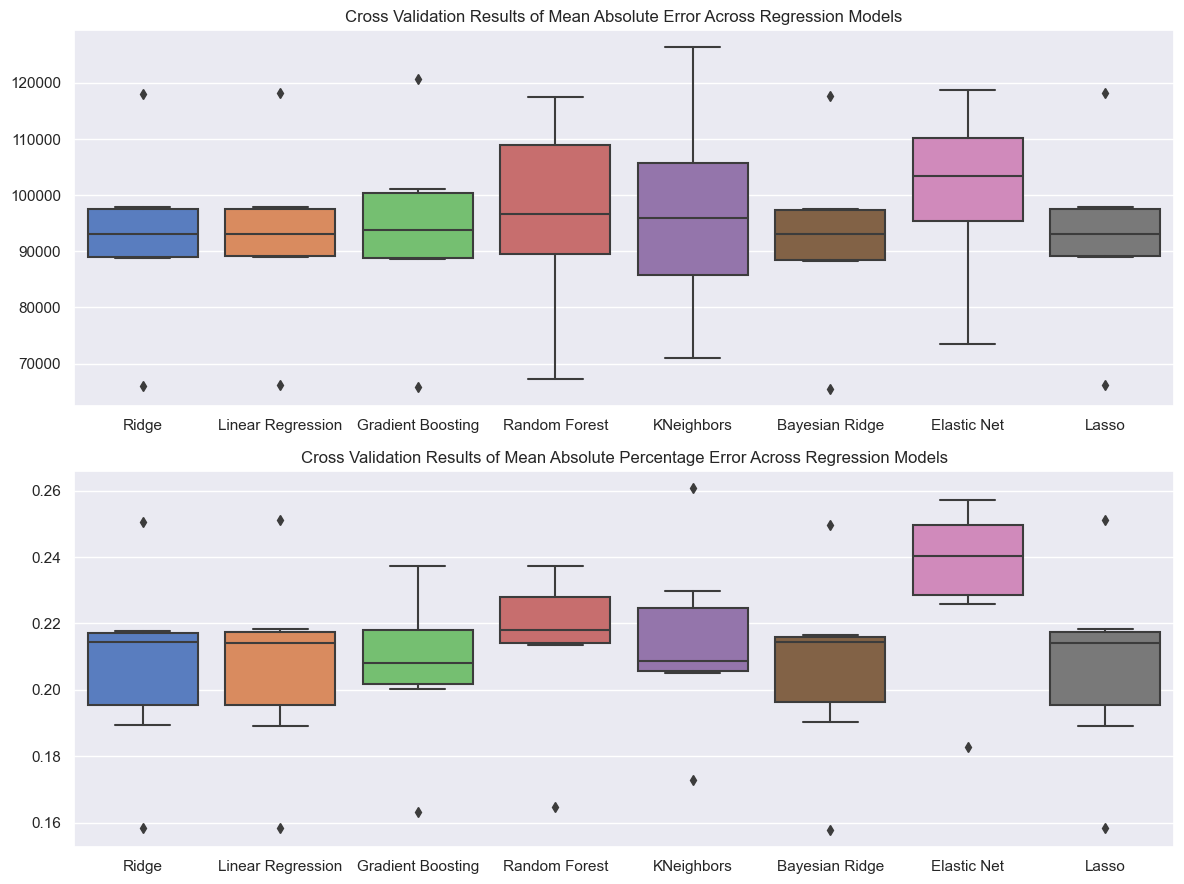

Ridge MAE Cross Validation Score: 92999.8625
Linear Regression MAE Cross Validation Score: 93011.6428
Gradient Boosting MAE Cross Validation Score: 93719.5232
Random Forest MAE Cross Validation Score: 96705.7024
KNeighbors MAE Cross Validation Score: 95865.5993
Bayesian Ridge MAE Cross Validation Score: 93028.878
Elastic Net MAE Cross Validation Score: 103384.2577
Lasso MAE Cross Validation Score: 93010.1144


Ridge MAPE Cross Validation Score: 0.2143
Linear Regression MAPE Cross Validation Score: 0.2142
Gradient Boosting MAPE Cross Validation Score: 0.2081
Random Forest MAPE Cross Validation Score: 0.2181
KNeighbors MAPE Cross Validation Score: 0.2087
Bayesian Ridge MAPE Cross Validation Score: 0.2145
Elastic Net MAPE Cross Validation Score: 0.2403
Lasso MAPE Cross Validation Score: 0.2142


In [19]:
# Import modules needed
from sklearn.linear_model import Ridge,LinearRegression,BayesianRidge,ElasticNet,Lasso
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Learning algorithms to be evaluated
models = {'Ridge': Ridge(),'Linear Regression': LinearRegression(),
          'Gradient Boosting': GradientBoostingRegressor(),'Random Forest':RandomForestRegressor(),
          'KNeighbors': KNeighborsRegressor(),'Bayesian Ridge': BayesianRidge(),'Elastic Net': ElasticNet(),
          'Lasso': Lasso()}

# Variable to store all cross validation results for later on
model_results_mae = []
model_results_mape = []

# Getting cross validation results for each learning algorithm for regression
for model in models.values():
    kf = KFold(n_splits=6,random_state=42,shuffle=True)
    cv_result_mae = cross_val_score(model,X_train_scaled,y_train,cv=kf,scoring='neg_mean_absolute_error')
    model_results_mae.append(-cv_result_mae)
    cv_result_mape = cross_val_score(model,X_train_scaled,y_train,cv=kf,scoring='neg_mean_absolute_percentage_error')
    model_results_mape.append(-cv_result_mape)
    
# Plotting boxplot to visualize cross validation results for each model
# Boxplot for MAE
sns.set_style("darkgrid")
fig,axs = plt.subplots(2,1,figsize=(12,9))
sns.boxplot(model_results_mae,ax=axs[0],palette=muted)
axs[0].set(title="Cross Validation Results of Mean Absolute Error Across Regression Models")
axs[0].set_xticklabels(models.keys())
# Boxplot for MAPE
sns.boxplot(model_results_mape,ax=axs[1],palette=muted)
axs[1].set(title="Cross Validation Results of Mean Absolute Percentage Error Across Regression Models")
axs[1].set_xticklabels(models.keys())
plt.tight_layout()
plt.show()

# Print score values
for x in range(len(models)):
    keys = list(models.keys())
    print(str(keys[x]) +" MAE Cross Validation Score: " + str(round(statistics.median(model_results_mae[x]),4)))
print('\n')
for x in range(len(models)):
    keys = list(models.keys())
    print(str(keys[x]) +" MAPE Cross Validation Score: " + str(round(statistics.median(model_results_mape[x]),4)))

From the MAE cross validation scores, we can see models such as Ridge, Linear Regression, Gradient Boosting, Random Forest, Bayesian Ridge and Lasso do equally well by having the lowest MAE score among the models. However, from the MAPE cross validation scores, we can see that clearly Gradient Boosting has the lowest median MAPE score, and hence the model's predictions are closer to the actual values on average compared to other models as it makes lesser errors in prediction, and therefore I would choose the Gradient Boosting Regressor as my learning algorithm.

### **Compare best three models on validation set [NOT IMPLEMENTED]** 
Initially, when I had the test validation set, I had compared the top three models as they had similar cross validation scores, however, since I decided to not implement validation set, I can no longer do this and decided to not implemented it as well.

In [20]:
# # Instantiate the best three models in a dictionary to loop
# best_three_models = {"Gradient Boosting ": GradientBoostingRegressor(),
#                      'Random Forest ': RandomForestRegressor(),
#                      'Bayesian Ridge ': BayesianRidge()}
# # Variable to increment to select name of model
# x = 0

# # Loop each model and predict with validation set and print evaluation metrics
# for model in best_three_models.values():
#     model.fit(X_train_scaled,y_train)
#     pred = model.predict(X_val_scaled)
#     evaluate(y_val,pred,list(best_three_models.keys())[x])
#     x +=1

Cross validation score for RMSE on Gradient Boosting for comparison later on

In [21]:
# Instantiate model
model = GradientBoostingRegressor()

# Instantiate KFold
kf = KFold(n_splits=6,shuffle=True,random_state=42)

# Perform cross validation score
cv_result_rmse = cross_val_score(estimator=model,X=X_train_scaled,y=y_train,cv=kf,scoring='neg_root_mean_squared_error')

# Print result
print("Gradient Boosting Median Cross Validation RMSE: " + str(statistics.median(-cv_result_rmse)))

Gradient Boosting Median Cross Validation RMSE: 126790.0763899713


### **Did you try to tune the hyperparameters of the learning algorithm, and in that case how?**
I utilized GridSearchCV from the sklearn.model_selection library to find the best hyperparameters for my Gradient Boosting Regressor to obtain the best cross validation score, adjusting hyperparameters such as:

    - max_depth: Maximum depth of each regression estimator
    - min_samples_split: Minimum number of samples required to split a node
    - min_samples_leaf: Minimum number of samples required at each leaf node
    - n_estimators: Number of boosting stages to perform
    - learning_rate: Learning rate for each boosting stage to final prediction
    - subsample: Fraction of samples used to train each boosting stage

In [22]:
# Import modules needed
from sklearn.model_selection import GridSearchCV

# Create hyperparameter grid to test on model
param_grid = {
    'max_depth': [2,4,6],  
    'min_samples_split': [2, 5, 6, 10], 
    'min_samples_leaf': [1, 2, 4, 8],  
    'n_estimators': [80,90,100], 
    'learning_rate': [0.001, 0.01,0.1], 
    'subsample':[0.5,0.75],
    'random_state':[42]
}

# Instantiate GradientBoostingRegressor() model
model = GradientBoostingRegressor()

kf = KFold(n_splits=6,shuffle=True,random_state=42)
# Instantiate GridSearchCV with model and paramgrid and fit the model  to test
gridsearch = GridSearchCV(estimator=model,param_grid=param_grid,cv=kf,n_jobs=-1,scoring='r2')
gridsearch.fit(X_train_scaled,y_train)

# Print best hyperparameters with best score
print("Best hyperparameters: " +str(gridsearch.best_params_) + "\nBest score from hyperparameters: " + str(gridsearch.best_score_))

## **MODEL EVALUATION**

### **How do you evaluate the quality of your system?**
To evaluate the quality of my system, some of the metrics I utilized are placed into a function defined earlier called evaluate(), which includes metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared score (R-squared), Mean Absolute Percentage Error (MAPE), and Explained Variance. 

MAE, MSE, RMSE and MAPE are referred to as "loss functions" or "error metrics", hence the lower the value for these metrics the better.

Whilst on the other hand the higher the R-squared score and explained variance, the better the fit of the regression model is to the data.

I also utilized a scatterplot of the predicted housing price against the actual housing price to visualise how well the model did in its prediction. The scatterplot should show points clustering close around the linear line, with an even distribution and consistent spread of data points along the line to indicate that the model performed well.

Lastly, I also plotted a residual plot and residual KDE plot to show the residuals (difference between predicted and actual) against the predicted values to identify trends in the residuals. The residual plot should be randomly scattered around the zero line to show that the model is unbiased and was able to capture the underlying pattern of the data. The residuals should also be centered around the zero line to show that the model is predicting the values accurately.

Gradient Boosting Regression Results:
---------------------------------------------
MAE: 82518.79520980286
MAPE:  0.16818963864635586
MSE: 15772198107.712107
RMSE: 125587.41221839117
R-squared: 0.5682991940674986
Explained Variance:  0.5940688156839147
---------------------------------------------


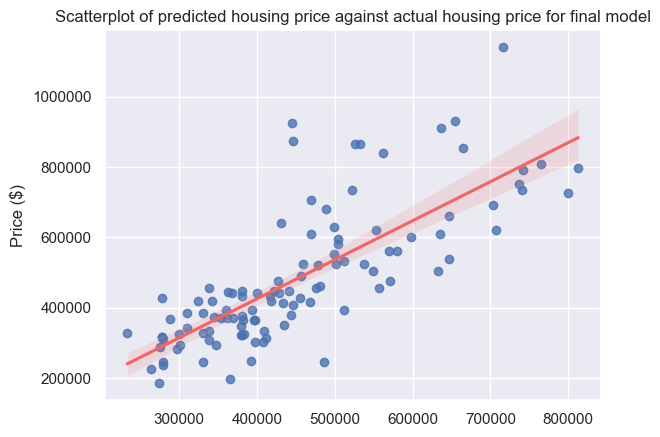

In [ ]:
# Import modules needed
from sklearn import metrics

# Instantiate final model with best hyperparameters
model = GradientBoostingRegressor(**gridsearch.best_params_)

# Fit the model
model.fit(X_train_scaled,y_train)

# Predict with model
pred = model.predict(X_test_scaled)

# Evaluate results
evaluate(y_test,pred,'Gradient Boosting ')

# Plot scatterplot of predictions
scatter(y_test,pred,'final model')

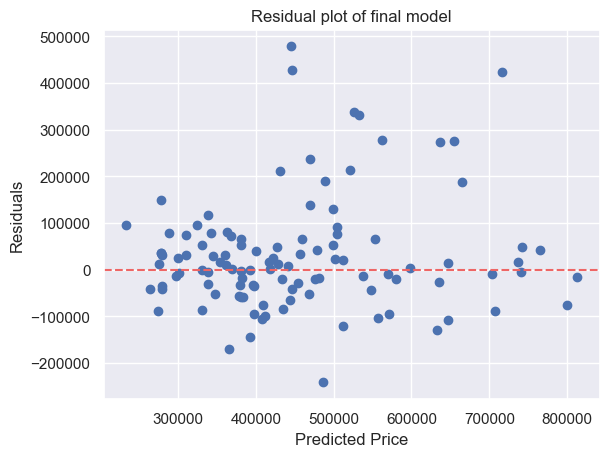

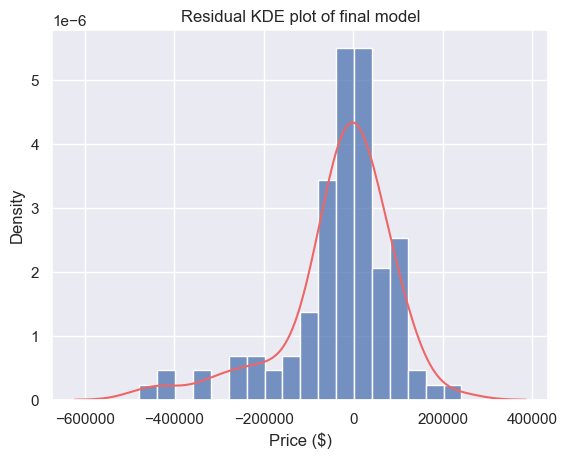

In [ ]:
# Residual plot for final model
residualPlot(y_test,pred,'final model')

# Residual KDE plot for final model
residualKdePlot(y_test,pred,'final model')

### **MODEL IMPROVEMENT WITH SPECIFIC HYPERPARAMETERS**
I also tried to manually adjust the hyperparameters of the model, and was able to find hyperparameters that increased the overall performance of the model even though it was not given from the GridSearchCV.

We can see a decrease in RMSE and MSE, indicating that with these hyperparameters, there are lesser prediction errors.

Furthermore, there was an increase in R-squared score and Explained Variance which indicates that the model with these hyperparameters made predictions that are a better fit to the actual data.

We can also see that the residual plots have lesser points of predicted data that deviate from the zero line in comparison to the previous model, indicating better performance in prediction.

Specific parameters Regression Results:
---------------------------------------------
MAE: 79447.39938366617
MAPE:  0.16008399350315997
MSE: 14708069038.02775
RMSE: 121276.82811661818
R-squared: 0.5974254689127477
Explained Variance:  0.6195750673109133
---------------------------------------------


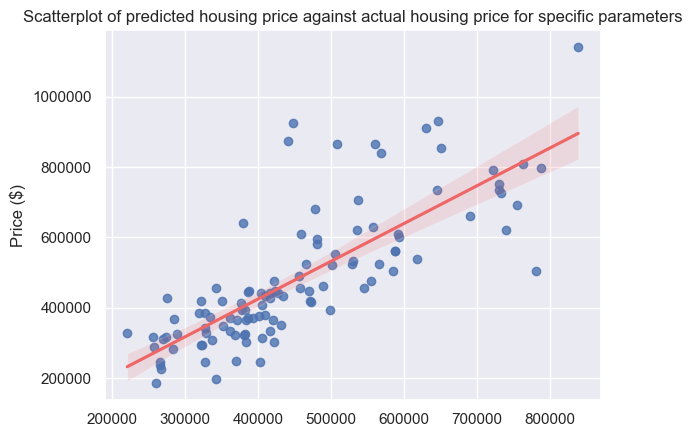

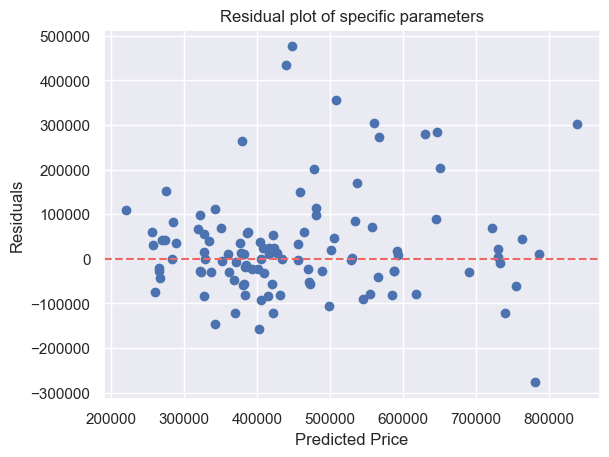

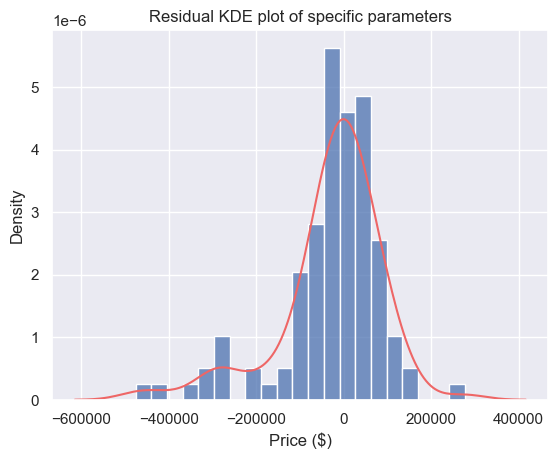

In [ ]:
# Instantiate model with specific hyperparameters
model = GradientBoostingRegressor(n_estimators=68,max_depth=4,min_samples_split=6,min_samples_leaf=1,learning_rate=0.1,subsample=0.75,random_state=42)

# Fit the model
model.fit(X_train_scaled,y_train)

# Predict with the model on X_test_scaled
pred = model.predict(X_test_scaled)

# Print and plot evaluation metrics
evaluate(y_test,pred,'Specific parameters ')
scatter(y_test,pred,'specific parameters')
residualPlot(y_test,pred,'specific parameters')
residualKdePlot(y_test,pred,'specific parameters')

### **How well does your system compare to a dummy baseline?**

I used sklearn.dummy's DummyRegressor as a dummy baseline model to be used in comparison to my own regression model.

Dummy Model Regression Results:
---------------------------------------------
MAE: 150476.01493981987
MAPE:  0.34004145789331963
MSE: 36605748013.62935
RMSE: 191326.2867815851
R-squared: -0.0019358627963730335
Explained Variance:  2.220446049250313e-16
---------------------------------------------


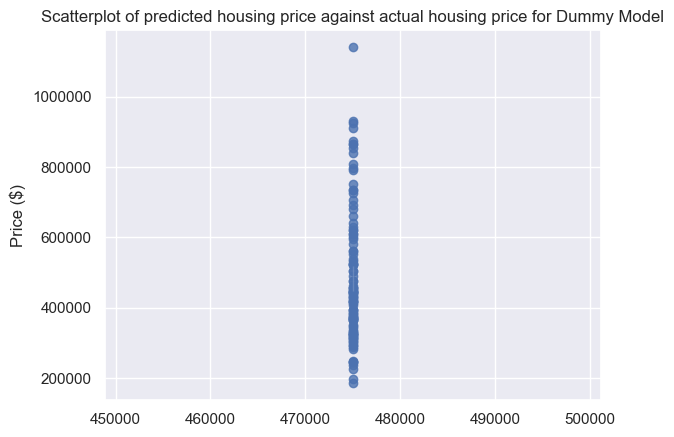

In [ ]:
# Import modules needed
from sklearn.dummy import DummyRegressor

# Instantiate dummy model
dr = DummyRegressor(strategy='mean')

# Fit dummy model
dr.fit(X_train_scaled,y_train)

# Predict with dummy model
dummy_pred = dr.predict(X_test_scaled)

# Evalute results of predictions
evaluate(y_test,dummy_pred,'Dummy Model ')

# Plot scatterplot of predictions
scatter(y_test,dummy_pred,'Dummy Model')

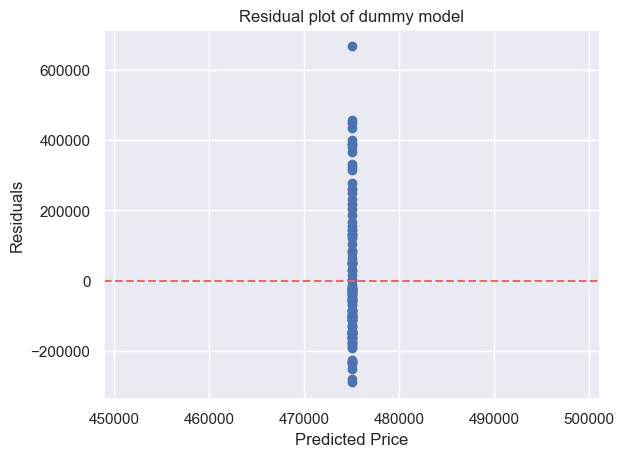

In [ ]:
# Plot residual plot of dummy model's results
residualPlot(y_test,dummy_pred,'dummy model')

From the results of the dummy model, we can clearly see that the dummy model was not able to capture the relationship in the data and the performance is worse than a model that just simply predicts the mean of the target variable, shown by the R-squared value of -0.001.

This also shows that my system performed way better than the dummy model as it was at least able to roughly capture the relationship of the data, even though not entirely accurate, it still performed better than the dummy model, and hence my system does well in comparison to the dummy model.

### **Is it possible to say something about which features the model considers important?**
From the feature importance score bar chart below, we can see that the most important feature would be the House Area (sqm), whilst the rest of the features are significantly less important compared to it, which tells us that only the House Area (sqm) feature has a strong influence on the target variable, Price ($), and would be a major determinant to the predicted housing prices. Hence, the model only considers House Area (sqm) important.

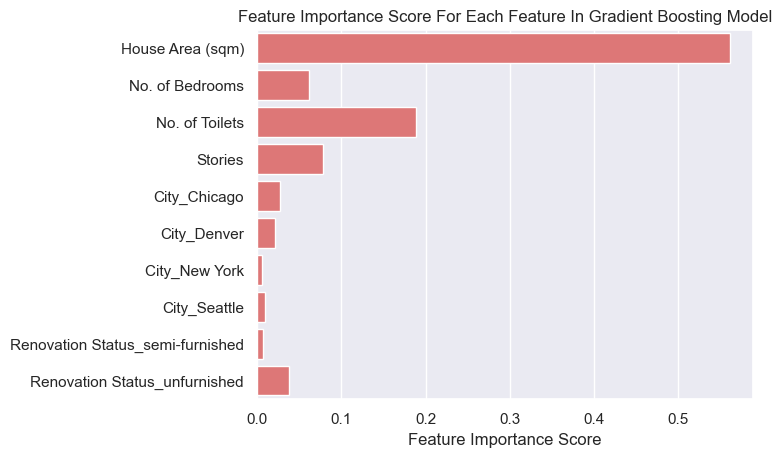

In [ ]:
# Get column names excluding output variable, Price ($)
columns = list(housing_dummy.columns)
columns.remove('Price ($)')

# Plot barplot of feature importance scores
sns.barplot(y=columns,x=model.feature_importances_,color='#ee6666').set(title='Feature Importance Score For Each Feature In Gradient Boosting Model',xlabel='Feature Importance Score')
plt.show()


### **Redo model with only important features**
Hence, I redid the model with only the important feature, House Area (sqm), to test if it would significantly affect the model's performance in predicting the housing prices.

Only important features Regression Results:
---------------------------------------------
MAE: 79447.39938366617
MAPE:  0.16008399350315997
MSE: 14708069038.02775
RMSE: 121276.82811661818
R-squared: 0.5974254689127477
Explained Variance:  0.6195750673109133
---------------------------------------------


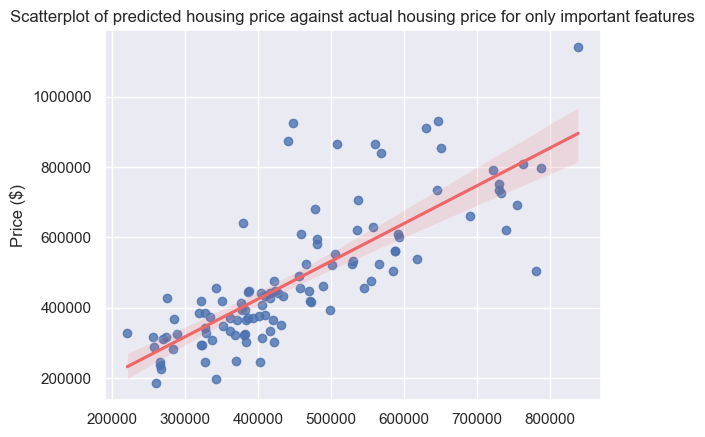

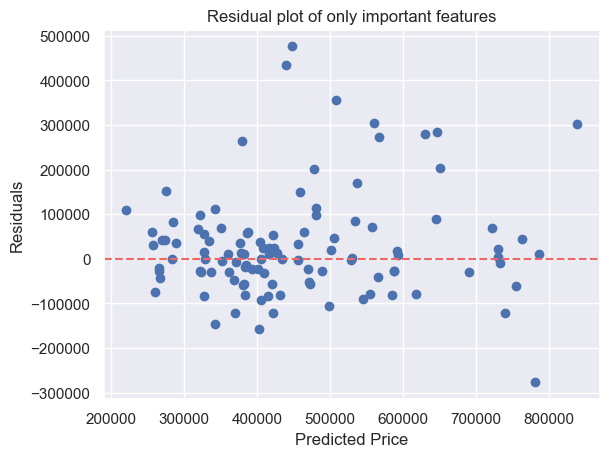

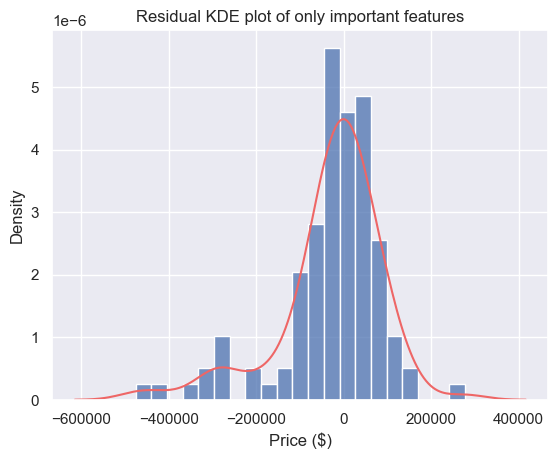

In [ ]:
# Variable with only important feature and output variable
house_impt = housing_dummy[['House Area (sqm)','Price ($)']]

# Create target and output variable as X and y
X_impt = house_impt['House Area (sqm)']
y_impt = house_impt['Price ($)']

# Train test split X and y
X_train_impt, X_test_impt, y_train_impt, y_test_impt = train_test_split(X, y, test_size=0.2, random_state=21)

# Scale values with RobustScaler()
scaler = RobustScaler()
scaled_X_train_impt = scaler.fit_transform(X_train_impt)
scaled_X_test_impt = scaler.transform(X_test_impt)

# Instantiate model with best scores
model = GradientBoostingRegressor(n_estimators=68,max_depth=4,min_samples_split=6,min_samples_leaf=1,learning_rate=0.1,subsample=0.75,random_state=42)

# Fit the model
model.fit(scaled_X_train_impt,y_train_impt)

# Predict with model using X_test_scaled
pred_impt = model.predict(scaled_X_test_impt)

# Print and plot evaluation metrics
evaluate(y_test,pred_impt,"Only important features ")
scatter(y_test,pred_impt,"only important features")
residualPlot(y_test,pred_impt,"only important features")
residualKdePlot(y_test,pred_impt,"only important features")

By removing the less important features, and keeping only the important feature, we can see that the scores do not deviate much compared to the final model with all features, which tells us that the House Area (sqm) feature mainly influences the model's prediction on housing price, and the other features do not influence the model much in comparison.

## **CONCLUSION**

In conclusion, even though the model may not have performed as well as expected likely due to weak relationships between the features and output variable, it still performs better in comparison to a dummy regressor, and there are still improvements that could be, and were made on the model.
